# **2.Data cleaning**

## Objectives
1. Data exploration
2. Data cleaning and analytics to see the cleaning effects.
3. Outlier handling


## Inputs
1. house_prices_records.csv

## Outputs
1. Data exploration
* List of variables with missing data.
* Data profiling report.

2. Data cleaning
* Summary of missing data
* Visualizations showing the distribution of variables before and after imputation.
* Cleaned dataset with missing values imputed appropriately.
* Outliers handling

---

# Change working directory

Change the working directory from its current folder to its parent folder
* Access the current directory with os.getcwd()

In [19]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-mvp'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [20]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [21]:
current_dir = os.getcwd()
current_dir

'/workspace'

---

# Explore the data

Load the data

In [22]:
import pandas as pd
df1 = pd.read_csv("/workspace/heritage-housing-mvp/outputs/datasets/collection/house_prices_records.csv")
df1.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


In Data Cleaning we are interested to check the distribution and shape of a variables. Data cleaning will be performed before correlation study due to that missing values can distort correlation calculations. The correlation methods that are planned to use (Spearman and Pearson) cannot handle missing values directly and will either omit them or return incorrent results. Also that completeness of data will provide a more accurate picture of the relationships between variables.

In [23]:
vars_with_missing_data = df1.columns[df1.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [24]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df1, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Custom function from Code Institute's churnometer project to display missing levels in a DataFrame, it show the absolute levels, relative levels and data type.

In [25]:
def EvaluateMissingData(df):
    missing_data_absolute = df1.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                    "PercentageOfDataset": missing_data_percentage,
                                    "DataType": df.dtypes}
                                    )
                        .sort_values(by=['PercentageOfDataset'], ascending=False)
                        .query("PercentageOfDataset > 0")
                        )

    return df_missing_data

EvaluateMissingData(df1)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64


Define the variables that are going to be used in DataCleaningEffect()

In [26]:
variables_applied_with_method = [
    'EnclosedPorch', 'WoodDeckSF', 'LotFrontage', 'GarageFinish',
    'BsmtFinType1', 'BedroomAbvGr', '2ndFlrSF', 'GarageYrBlt', 'MasVnrArea'
]

Define the analysed dataset

In [27]:
import pandas as pd
df_original = pd.read_csv("/workspace/heritage-housing-mvp/outputs/datasets/collection/house_prices_records.csv")

Defining DataCleaningEffect() function:
* Code copied and adapted from Unit 9 of the feature engine lesson

In [28]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

def DataCleaningEffect(df_original, df_cleaned, variables_applied_with_method):
    """
    Function to visualize data cleaning effect
    """
    flag_count=1 # Indicate plot number

    # Distinguish between numerical and categorical variables
    categorical_variables = df_original.select_dtypes(exclude=['number']).columns

    # scan over variables,
    # first on variables that you applied the method
    # if the variables is a numerical plot, a histogram if categorical plot a barplot
    for set_of_variables in [variables_applied_with_method]:
        print("\n================================================================================================")
        print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
        print(f"{set_of_variables} \n\n")

    for var in set_of_variables:
        if var in categorical_variables: # it is categorical variable: barplot

            dfA = pd.DataFrame({"Type":"Original","Value":df_original[var]})
            dfB = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]})
            dfAux = pd.concat([dfA, dfB], axis=0)
            fig, axes = plt.subplots(figsize=(15, 5))
            sns.countplot(hue='Type', data=dfAux, x="Value", palette=['#432371', "#FAAE7B"])
            axes.set(title=f"Distribution Plot {flag_count}: {var}")
            plt.xticks(rotation=90)
            plt.legend()

        else: # it is numerical variable: histogram

            fig, axes = plt.subplots(figsize=(10, 5))
            sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True, element="step", ax=axes)
            sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True, element="step", ax=axes)
            axes.set(title=f"Distribution Plot {flag_count}: {var}")
            plt.legend()

        plt.show()
        flag_count+= 1

---

## Split into Train and Test sets

Split the dataset into Train and Test sets so that it is possible to train the data using the imputation methods on the Train Set and then see the effects on the Test Set.

In [29]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df1,
                                        df1['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


---

# Clean the data

**Median imputation:**


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['LotFrontage', 'GarageYrBlt', 'MasVnrArea', '2ndFlrSF'] 




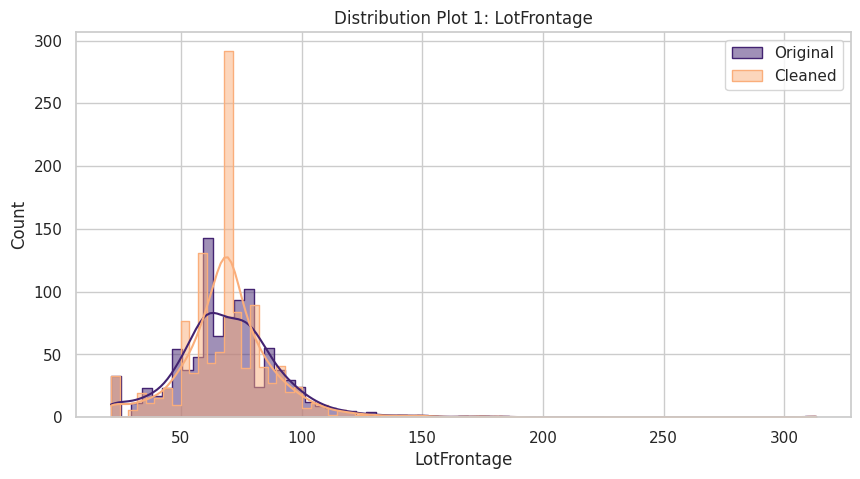

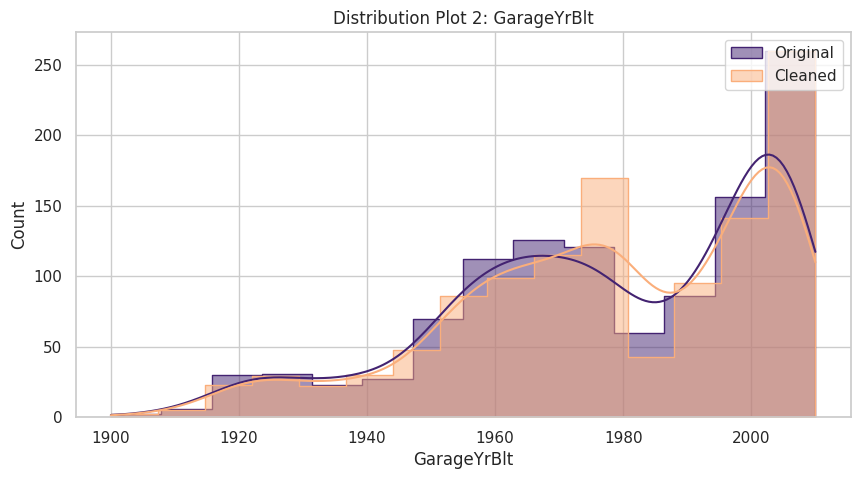

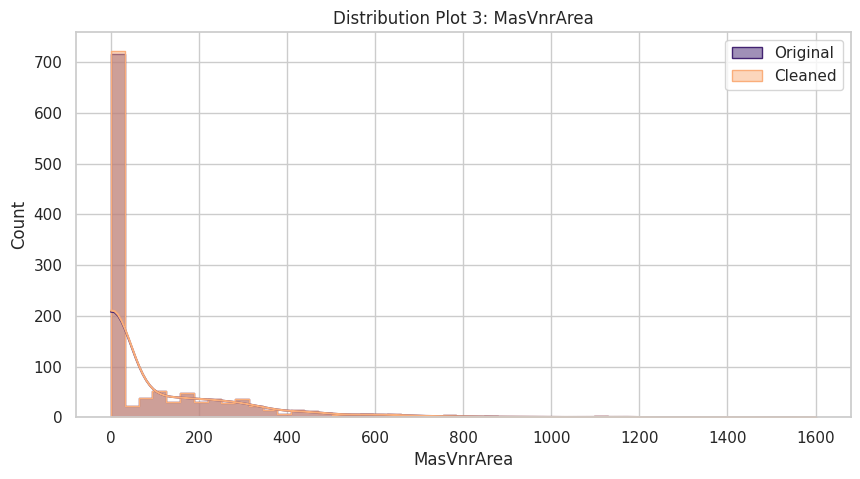

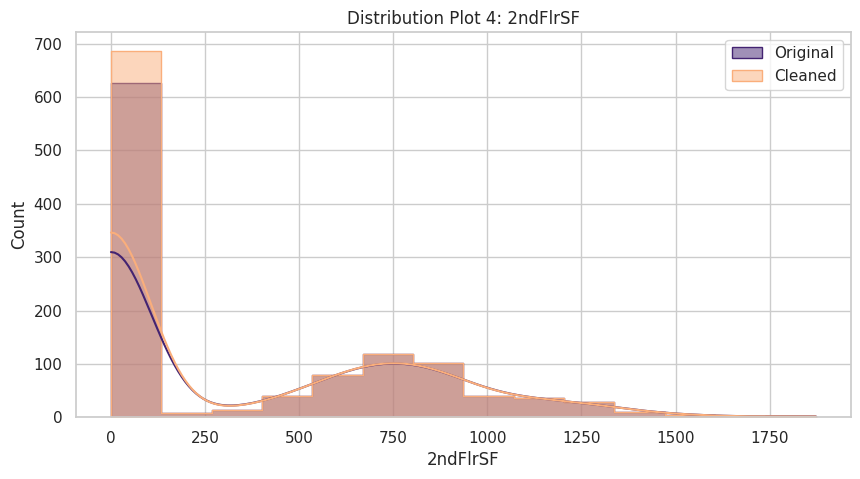

In [30]:
from feature_engine.imputation import MeanMedianImputer

variables_median = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', '2ndFlrSF']

imputer = MeanMedianImputer(imputation_method='median', variables=variables_median)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                    df_cleaned=df_method,
                    variables_applied_with_method=variables_median)

Median imputation appears to be justified approach for handling missing values in these datasets. It effectively maintains the original distribution patterns and does not introduce singificant distortions.

**Drop the variables**

In [31]:
from feature_engine.selection import DropFeatures

variables_drop = ['EnclosedPorch', 'WoodDeckSF']

imputer = DropFeatures(features_to_drop=variables_drop)
df_method = imputer.fit_transform(TrainSet)

for i in variables_drop:
    print(i in df_method.columns.to_list())

False
False


**Categorical imputing with 'None':**

Comparison analysis between GarageFinish and GarageArea to see if it is reasonable to impute with None.

In [32]:
df1[(df1['GarageArea'] ==0)][['GarageFinish', 'GarageArea']]

,GarageFinish,GarageArea
39,None,0
48,None,0
78,None,0
88,None,0
89,None,0
...,...,...
1349,None,0
1407,None,0
1449,None,0
1450,None,0


Now do the same for BsmtFinType1, with comparison of TotalBsmtSF

In [33]:
df1[(df1['TotalBsmtSF'] ==0)][['BsmtFinType1', 'TotalBsmtSF']]

,BsmtFinType1,TotalBsmtSF
17,None,0
39,None,0
90,NaN,0
102,None,0
156,None,0
182,NaN,0
259,None,0
342,None,0
362,NaN,0
371,None,0



* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BsmtFinType1', 'GarageFinish'] 




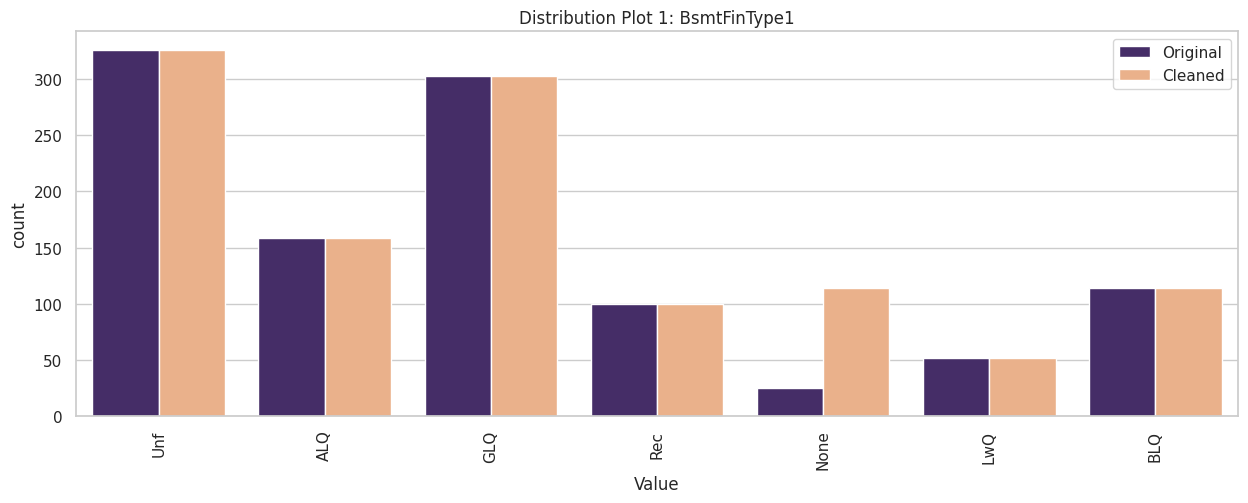

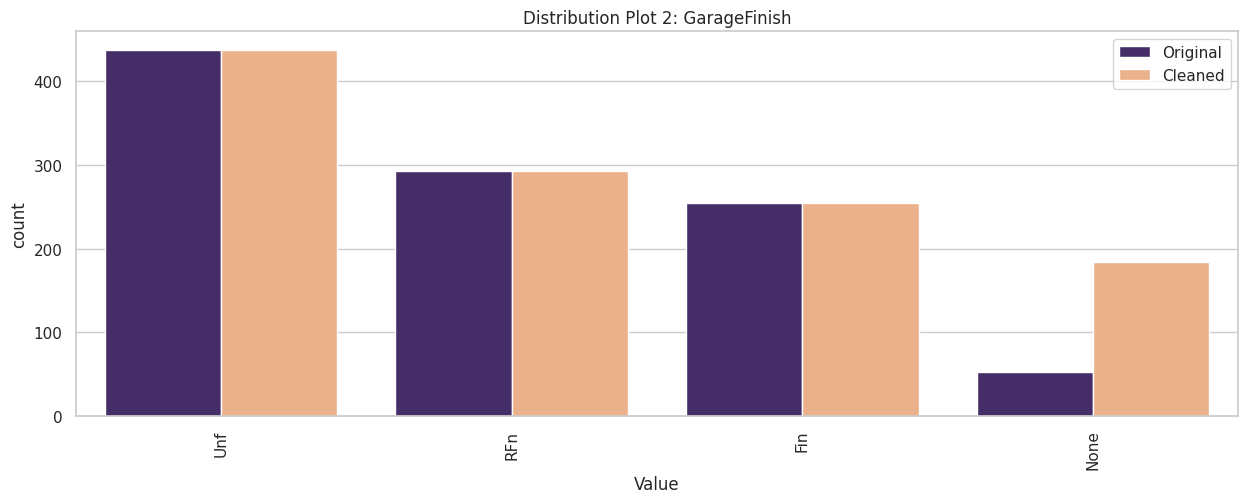

In [34]:
from feature_engine.imputation import CategoricalImputer

variables_categorical = ['BsmtFinType1', 'GarageFinish']

imputer = CategoricalImputer(imputation_method='missing', fill_value='None', variables=variables_categorical)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                    df_cleaned=df_method,
                    variables_applied_with_method=variables_categorical)


**Mean imputing:**


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BedroomAbvGr'] 




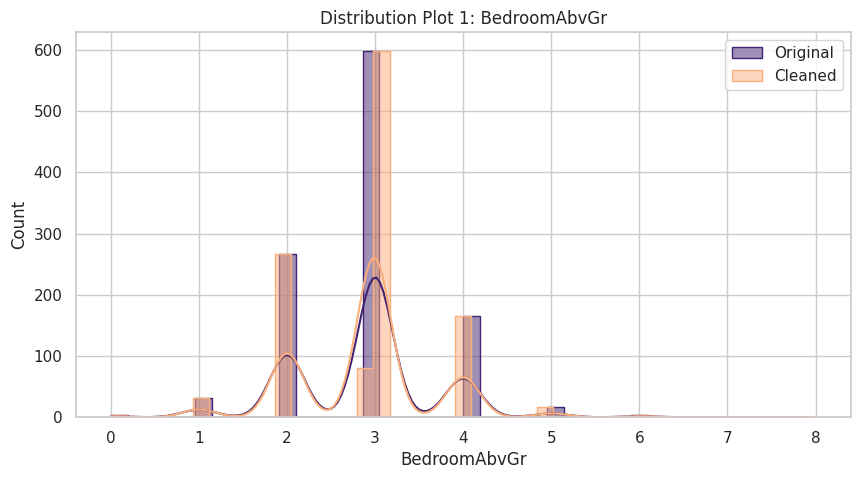

In [35]:
from feature_engine.imputation import MeanMedianImputer

variables_mean = ['BedroomAbvGr']

imputer = MeanMedianImputer(imputation_method='mean', variables=variables_mean)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                    df_cleaned=df_method,
                    variables_applied_with_method=variables_mean)

**Imputation Methods:**
1. LotFrontage:
* Will be imputed with the median value since it's a continuous numerical variable, and the median is robust to outliers.
2. GarageYrBlt:
* Imputation with the median value. It represents the year the garage was built, so using the median provides a reasonable value because preservation of the most common value, less affected by extreme values and preservation of temporal trends.
3. MasVnrArea:
* Since only 0.5% of the data is missing, it's safe to impute with the median value for this continuous numerical variable.
4. 2ndFlrSF:
* Imputation with median is justified, because of it's robustness and low levels of missing data (5.9%).
5. BedroomAbvGr:
* Imputation with the mean since it's a discrete numerical variable representing the number of bedrooms above grade.
6. BsmtFinType1 and GarageFinish:
* The comparison analysis showed that it is reasonable to assume that missing values can be be seen as there is none of that area present.
8. EnclosedPorch, WoodDeckSF:
* Will be dropped since of high levels of missing data.


---

# Data cleaning pipeline

Organize all the data cleaning steps into a single cleaning pipeline.

In [36]:
from sklearn.pipeline import Pipeline

dataCleaning_pipeline = Pipeline([
    ('median', MeanMedianImputer(imputation_method='median',
                                variables=['LotFrontage','GarageYrBlt','MasVnrArea','2ndFlrSF']) ),
    ('drop', DropFeatures(features_to_drop=['EnclosedPorch', 'WoodDeckSF']) ),
    ('categorical', CategoricalImputer(imputation_method='missing',
                                fill_value='None',
                                variables=['BsmtFinType1', 'GarageFinish']) ),
    ('mean', MeanMedianImputer(imputation_method='mean',
                                variables=['BedroomAbvGr']) ),
])

Apply the pipeline to the whole dataset to get cleaned data.

In [38]:
TrainSet, TestSet = dataCleaning_pipeline.fit_transform(TrainSet) , dataCleaning_pipeline.fit_transform(TestSet)

KeyError: "None of [Index(['EnclosedPorch', 'WoodDeckSF'], dtype='object')] are in the [columns]"

In [39]:
df1 = dataCleaning_pipeline.fit_transform(df1)

In [40]:
EvaluateMissingData(df1)

,RowsWithMissingData,PercentageOfDataset,DataType


In [41]:
EvaluateMissingData(TrainSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [42]:
EvaluateMissingData(TestSet)

,RowsWithMissingData,PercentageOfDataset,DataType


---

# Outlier handling

Handling outliers after imputing missing data is considered a good practice for several reasons:
1. Preservation of data integrity
2. Avoiding data leakage
3. Consistency in data handling practices

Custom function code from Churnometer project is going to be utilized for outlier handling.

In [43]:
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df,analysis_type=None):


  """
  - used for quick feature engineering on numerical and categorical variables
  to decide which transformation can better transform the distribution shape 
  - Once transformed, use a reporting tool, like pandas-profiling, to evaluate distributions

  """
  check_missing_values(df)
  allowed_types= ['numerical', 'ordinal_encoder',  'outlier_winsorizer']
  check_user_entry_on_analysis_type(analysis_type, allowed_types)
  list_column_transformers = define_list_column_transformers(analysis_type)
  
  
  # Loop in each variable and engineer the data according to the analysis type
  df_feat_eng = pd.DataFrame([])
  for column in df.columns:
    # create additional columns (column_method) to apply the methods
    df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
    for method in list_column_transformers:
      df_feat_eng[f"{column}_{method}"] = df[column]
      
    # Apply transformers in respectives column_transformers
    df_feat_eng,list_applied_transformers = apply_transformers(analysis_type, df_feat_eng, column)

    # For each variable, assess how the transformations perform
    transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng)

  return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
  ### Check analyis type
  if analysis_type == None:
    raise SystemExit(f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
  if analysis_type not in allowed_types:
      raise SystemExit(f"analysis_type argument should be one of these options: {allowed_types}")

def check_missing_values(df):
  if df.isna().sum().sum() != 0:
    raise SystemExit(
        f"There is missing value in your dataset. Please handle that before getting into feature engineering.")



def define_list_column_transformers(analysis_type):
  ### Set suffix colummns acording to analysis_type
  if analysis_type=='numerical':
    list_column_transformers = ["log_e","log_10","reciprocal", "power","box_cox","yeo_johnson"]
  
  elif analysis_type=='ordinal_encoder':
    list_column_transformers = ["ordinal_encoder"]

  elif analysis_type=='outlier_winsorizer':
    list_column_transformers = ['iqr']

  return list_column_transformers



def apply_transformers(analysis_type, df_feat_eng, column):


  for col in df_feat_eng.select_dtypes(include='category').columns:
    df_feat_eng[col] = df_feat_eng[col].astype('object')


  if analysis_type=='numerical':
    df_feat_eng,list_applied_transformers = FeatEngineering_Numerical(df_feat_eng,column)
  
  elif analysis_type=='outlier_winsorizer':
    df_feat_eng,list_applied_transformers = FeatEngineering_OutlierWinsorizer(df_feat_eng,column)

  elif analysis_type=='ordinal_encoder':
    df_feat_eng,list_applied_transformers = FeatEngineering_CategoricalEncoder(df_feat_eng,column)

  return df_feat_eng,list_applied_transformers



def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
  # For each variable, assess how the transformations perform
  print(f"* Variable Analyzed: {column}")
  print(f"* Applied transformation: {list_applied_transformers} \n")
  for col in [column] + list_applied_transformers:
    
    if analysis_type!='ordinal_encoder':
      DiagnosticPlots_Numerical(df_feat_eng, col)
    
    else:
      if col == column: 
        DiagnosticPlots_Categories(df_feat_eng, col)
      else:
        DiagnosticPlots_Numerical(df_feat_eng, col)

    print("\n")



def DiagnosticPlots_Categories(df_feat_eng, col):
  plt.figure(figsize=(4, 3))
  sns.countplot(data=df_feat_eng, x=col,palette=['#432371'],order = df_feat_eng[col].value_counts().index)
  plt.xticks(rotation=90) 
  plt.suptitle(f"{col}", fontsize=30,y=1.05)        
  plt.show()
  print("\n")



def DiagnosticPlots_Numerical(df, variable):
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))
  sns.histplot(data=df, x=variable, kde=True,element="step",ax=axes[0]) 
  stats.probplot(df[variable], dist="norm", plot=axes[1])
  sns.boxplot(x=df[variable],ax=axes[2])
  
  axes[0].set_title('Histogram')
  axes[1].set_title('QQ Plot')
  axes[2].set_title('Boxplot')
  fig.suptitle(f"{variable}", fontsize=30,y=1.05)
  plt.tight_layout()
  plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng,column):
  list_methods_worked = []
  try:  
    encoder= OrdinalEncoder(encoding_method='arbitrary', variables = [f"{column}_ordinal_encoder"])
    df_feat_eng = encoder.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_ordinal_encoder")
  
  except: 
    df_feat_eng.drop([f"{column}_ordinal_encoder"],axis=1,inplace=True)
    
  return df_feat_eng,list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng,column):
  list_methods_worked = []

  ### Winsorizer iqr
  try: 
    disc=Winsorizer(
        capping_method='iqr', tail='both', fold=1.5, variables = [f"{column}_iqr"])
    df_feat_eng = disc.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_iqr")
  except: 
    df_feat_eng.drop([f"{column}_iqr"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked




def FeatEngineering_Numerical(df_feat_eng,column):

  list_methods_worked = []

  ### LogTransformer base e
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_e"])
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_e")
  except: 
    df_feat_eng.drop([f"{column}_log_e"],axis=1,inplace=True)

    ### LogTransformer base 10
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_10"],base='10')
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_10")
  except: 
    df_feat_eng.drop([f"{column}_log_10"],axis=1,inplace=True)

  ### ReciprocalTransformer
  try:
    rt = vt.ReciprocalTransformer(variables = [f"{column}_reciprocal"])
    df_feat_eng =  rt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_reciprocal")
  except:
    df_feat_eng.drop([f"{column}_reciprocal"],axis=1,inplace=True)

  ### PowerTransformer
  try:
    pt = vt.PowerTransformer(variables = [f"{column}_power"])
    df_feat_eng = pt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_power")
  except:
    df_feat_eng.drop([f"{column}_power"],axis=1,inplace=True)

  ### BoxCoxTransformer
  try:
    bct = vt.BoxCoxTransformer(variables = [f"{column}_box_cox"])
    df_feat_eng = bct.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_box_cox")
  except:
    df_feat_eng.drop([f"{column}_box_cox"],axis=1,inplace=True)


  ### YeoJohnsonTransformer
  try:
    yjt = vt.YeoJohnsonTransformer(variables = [f"{column}_yeo_johnson"])
    df_feat_eng = yjt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_yeo_johnson")
  except:
        df_feat_eng.drop([f"{column}_yeo_johnson"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked

Winsorizing is going to be used instead of trimmer so to keep the observations in the data while reducing their effect on the prediction.
Variables_engineering is going to be defined with variables with potential outliers.

In [44]:
variables_engineering = ['GarageArea',
                        'LotArea',
                        'LotFrontage',
                        'MasVnrArea',
                        'OpenPorchSF',
                        'TotalBsmtSF',
                        '1stFlrSF',
                        '2ndFlrSF',
                        ]

Apply similar step as above and create a separate dataframe

In [45]:
df_engineering = TrainSet[variables_engineering].copy()

Apply the transformation and asses the distributions

* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_iqr'] 



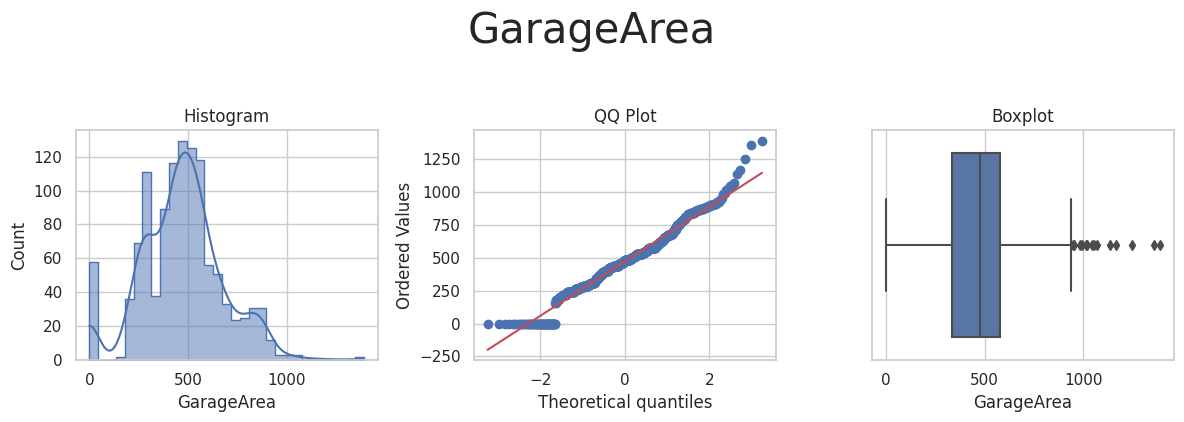

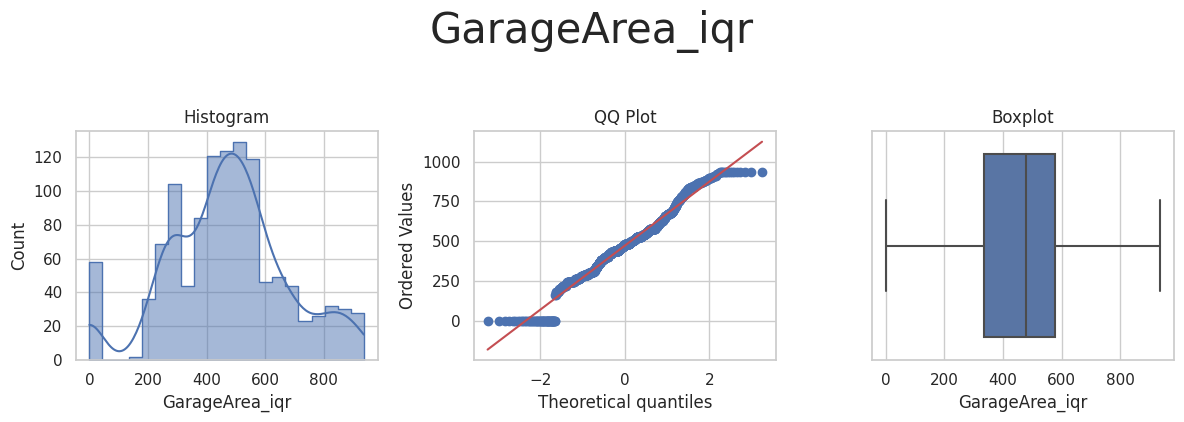



* Variable Analyzed: LotArea
* Applied transformation: ['LotArea_iqr'] 



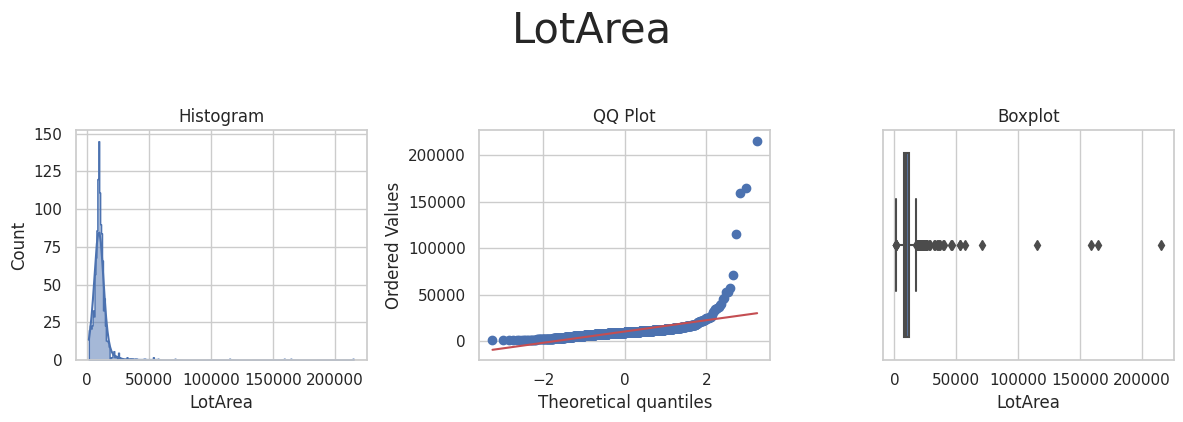

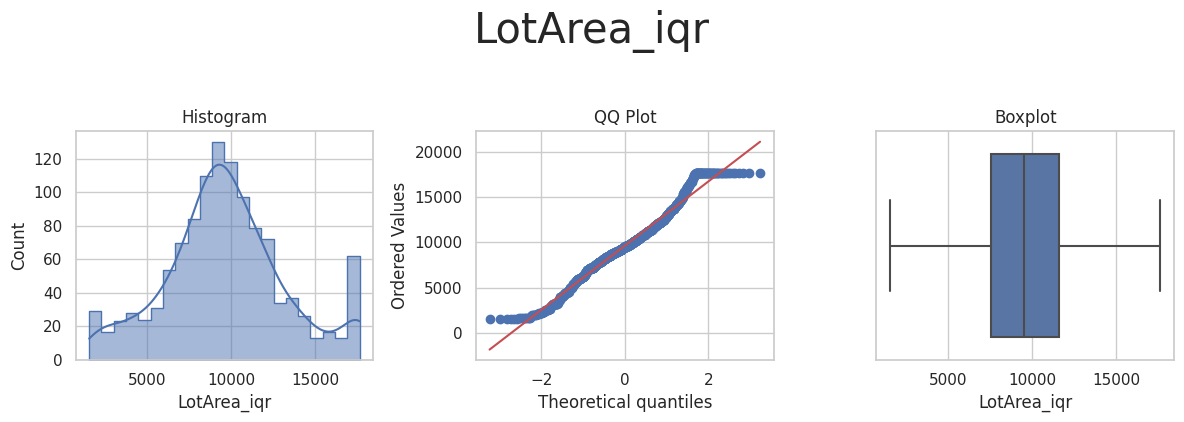



* Variable Analyzed: LotFrontage
* Applied transformation: ['LotFrontage_iqr'] 



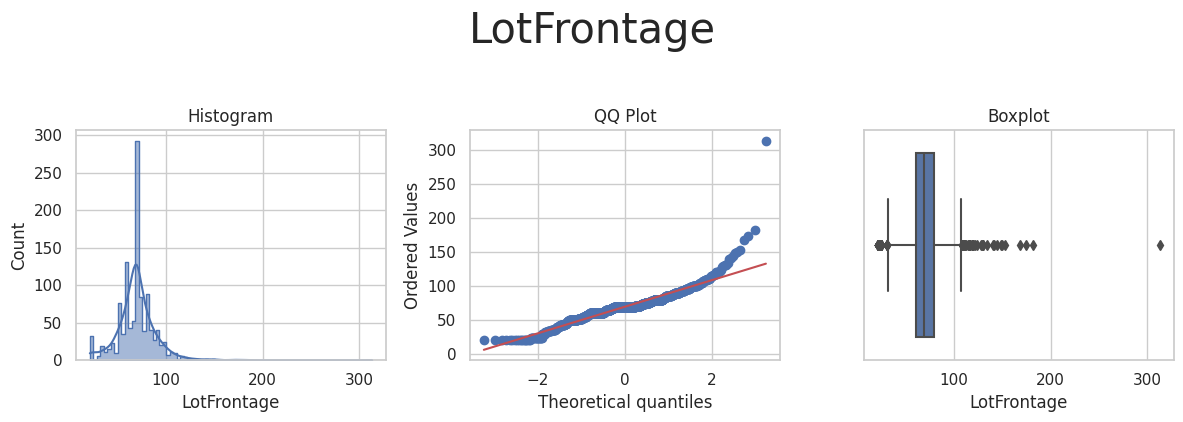

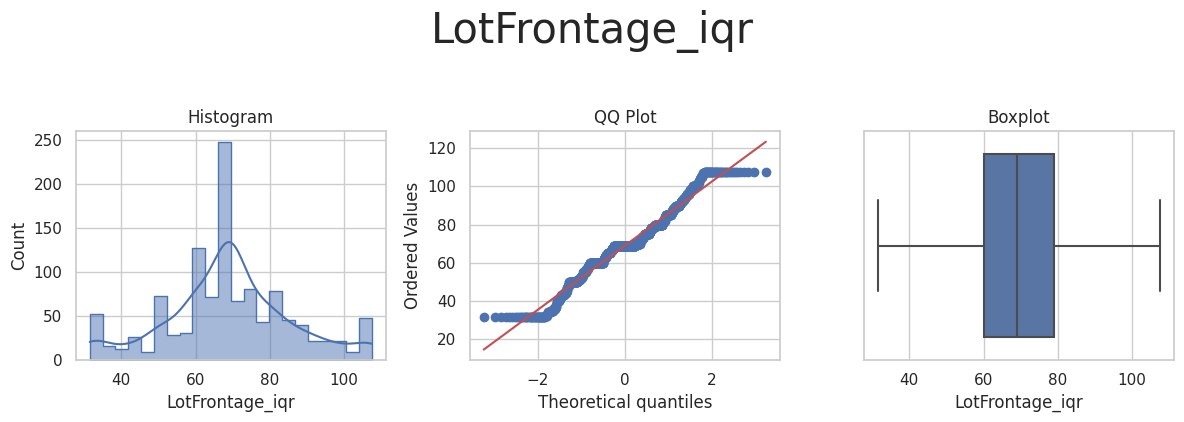



* Variable Analyzed: MasVnrArea
* Applied transformation: ['MasVnrArea_iqr'] 



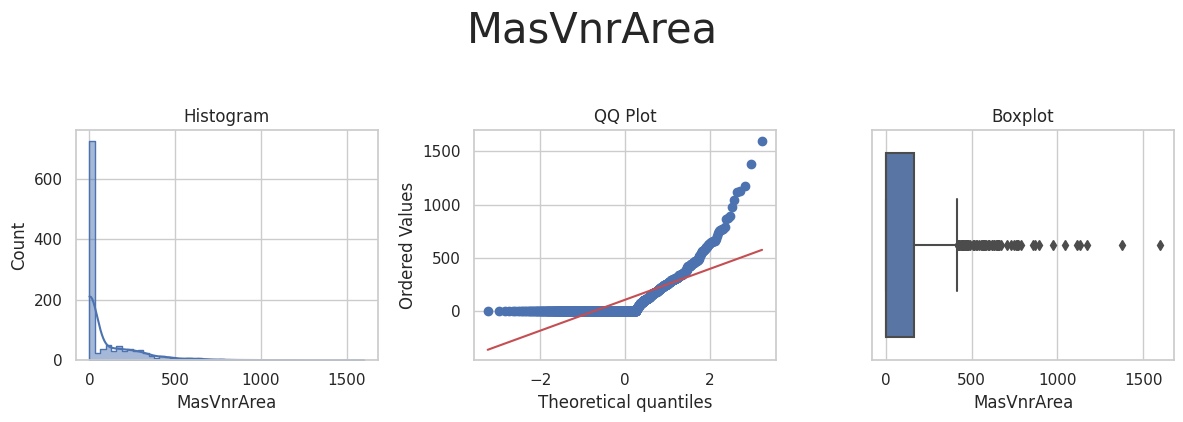

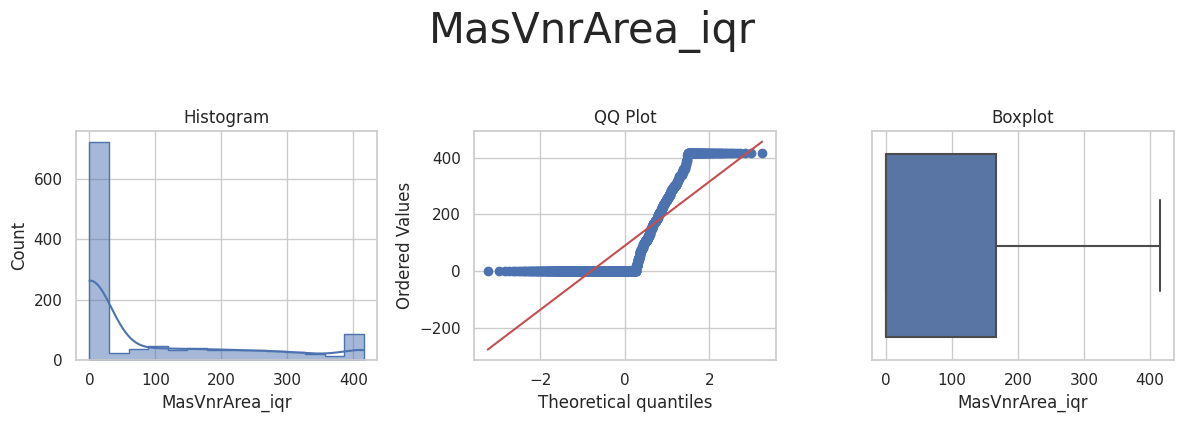



* Variable Analyzed: OpenPorchSF
* Applied transformation: ['OpenPorchSF_iqr'] 



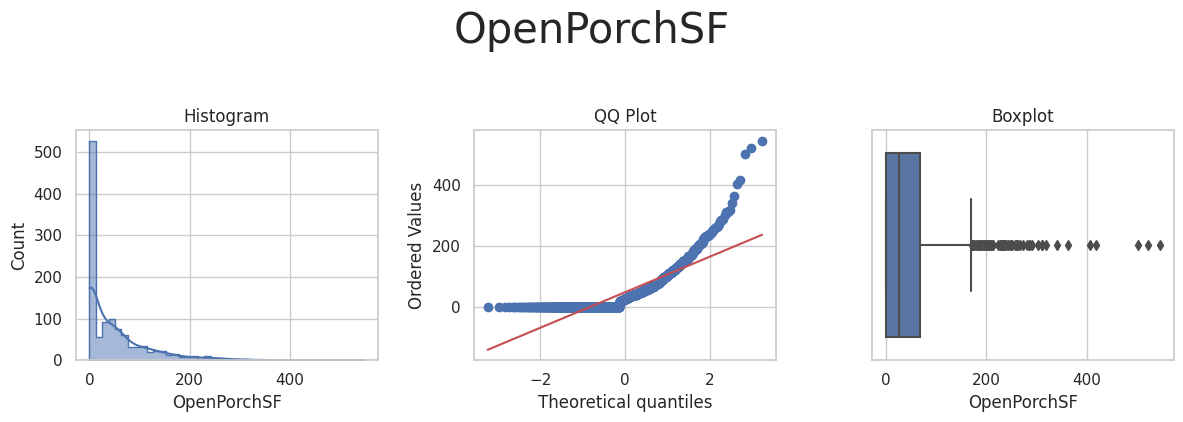

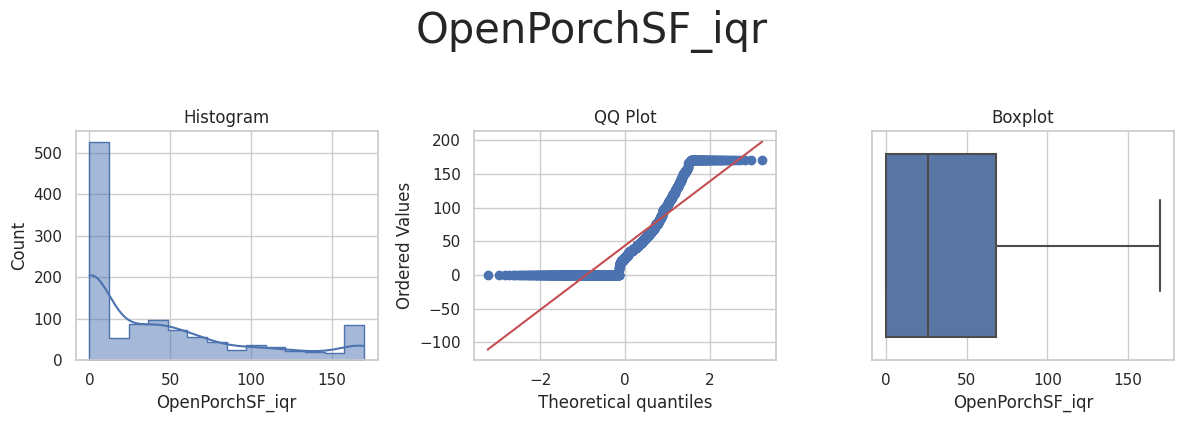



* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_iqr'] 



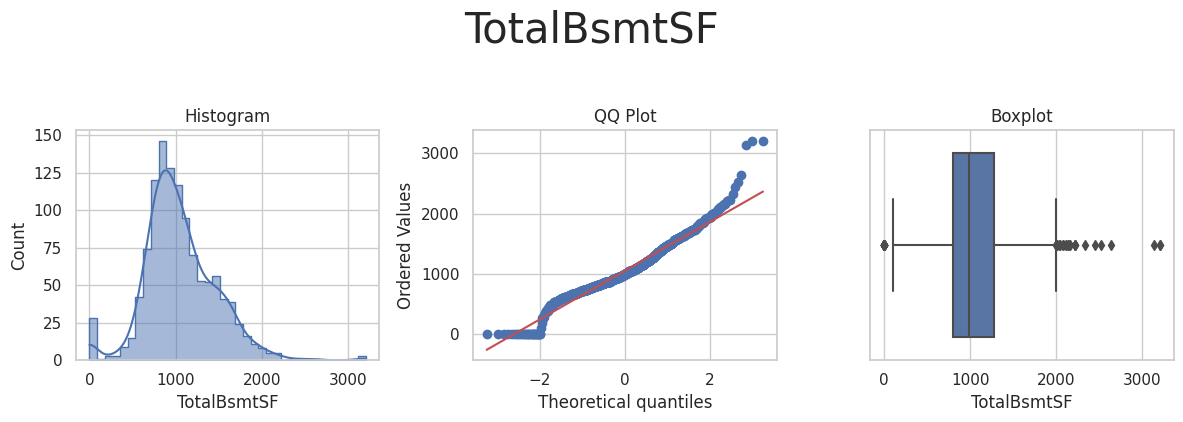

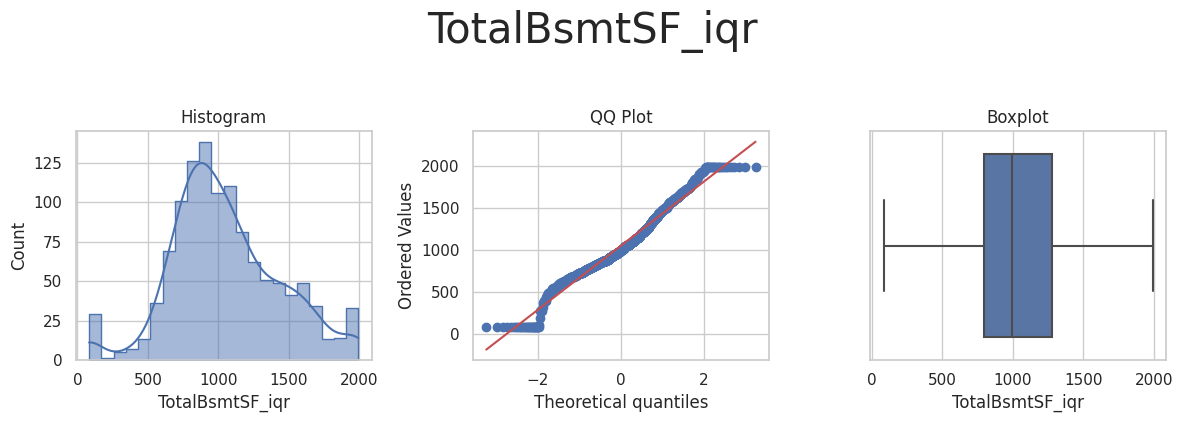



* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_iqr'] 



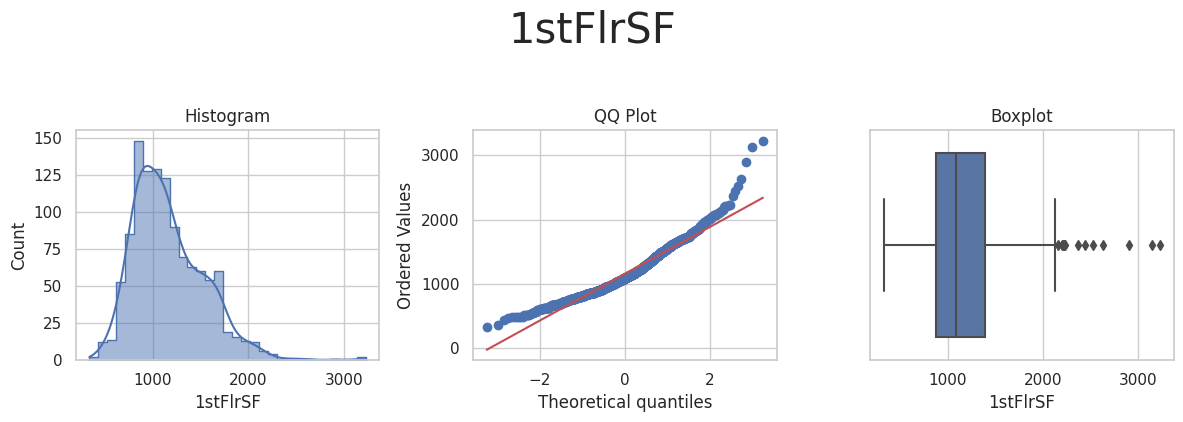

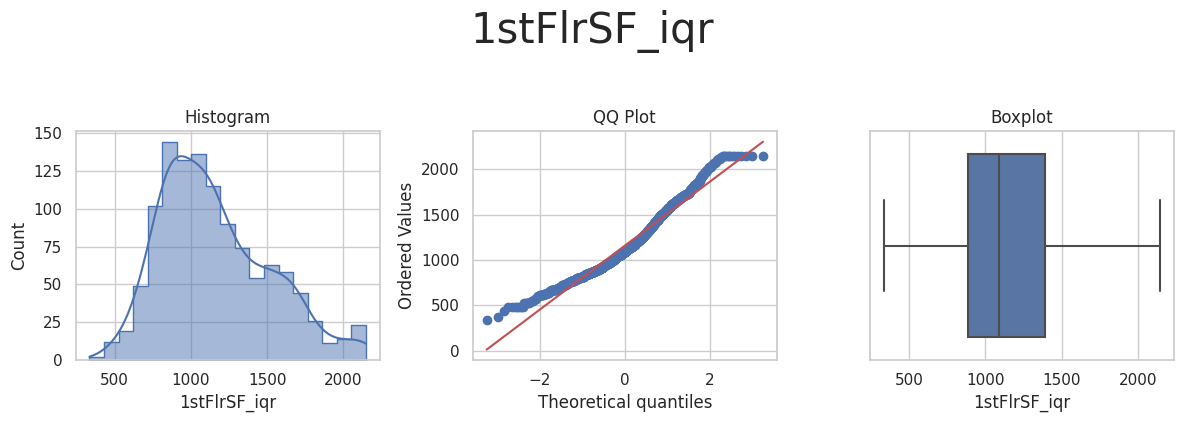



* Variable Analyzed: 2ndFlrSF
* Applied transformation: ['2ndFlrSF_iqr'] 



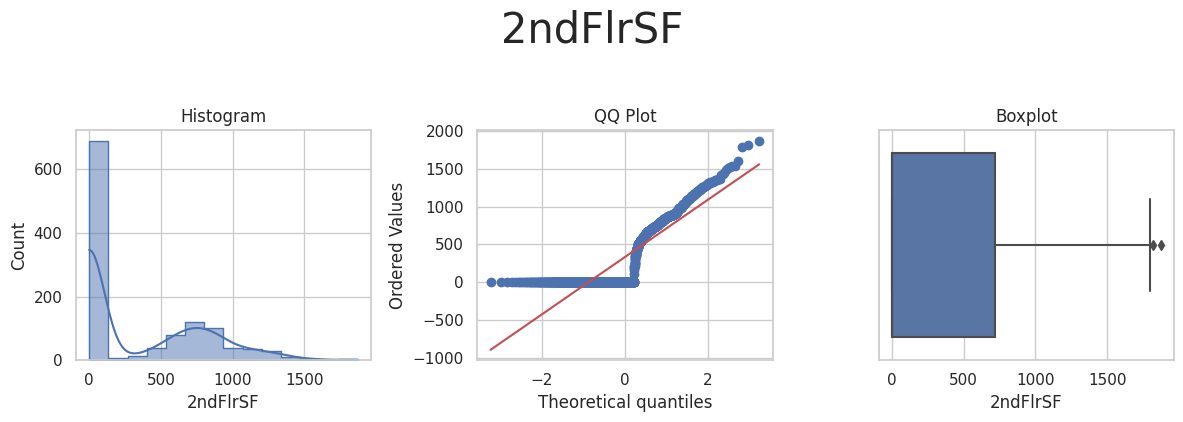

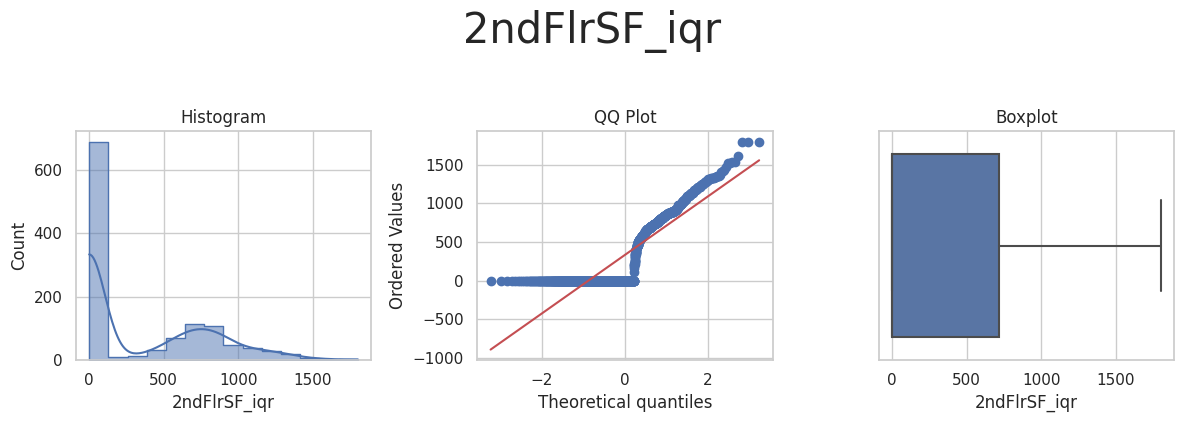

In [46]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='outlier_winsorizer')

As it can be seen from the plots, winsorization has done a good job relieving skewness of the data and eliminating outliers.

---

# Data cleaning pipeline update

In [48]:
from sklearn.pipeline import Pipeline

dataCleaning_pipeline = Pipeline([
    ('median', MeanMedianImputer(imputation_method='median',
                                variables=['LotFrontage','GarageYrBlt','MasVnrArea','2ndFlrSF']) ),
    ('categorical', CategoricalImputer(imputation_method='missing',
                                fill_value='None',
                                variables=['BsmtFinType1', 'GarageFinish']) ),
    ('mean', MeanMedianImputer(imputation_method='mean',
                                variables=['BedroomAbvGr']) ),
    ('winsorizer', Winsorizer(capping_method='iqr', fold=1.5, tail='both', variables=[
                            'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea',
                            'OpenPorchSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']))
])

df1 = dataCleaning_pipeline.fit_transform(df1)
TrainSet = dataCleaning_pipeline.fit_transform(TrainSet)
TestSet = dataCleaning_pipeline.fit_transform(TestSet)

Save

In [53]:
df1.to_csv("/workspace/heritage-housing-mvp/outputs/datasets/collection/HousePricesCleaned.csv", index=False)
TrainSet.to_csv("/workspace/heritage-housing-mvp/outputs/datasets/collection/TrainSetCleaned.csv", index=False)
TestSet.to_csv("/workspace/heritage-housing-mvp/outputs/datasets/collection/TestSetCleaned.csv", index=False)

# Conclusion

In this notebook it was successfully navigated through several critical steps to ensure the dataset was adequately prepared for further analysis and modeling.

1. Data exploration
* Dataset was previewed, which gave an initial understanding of its structures and contents.
* Variables with missing data were identified, highlighting key areas that require cleaning.

2. Data profiling
* Detailed profiling report was generated, providing insights into data distributions, and missing data patterns.

3. Data cleaning
* Missing data was summarized, understanding its extent and distribution across the dataset.
* Several imputation methods were applied:
- Median imputation method for 'LotFrontage', 'GarageYrBlt', 'MasVnrArea' and '2ndFlrSf'.
- Mode imputation for 'BedroomAbvGr'
- Categorical imputer for 'BsmtFinType1' and 'GarageFinish'.
* Variables with high levels of missing data, such as 'EnclosedPorch' and 'WoodDeckSF', were dropped.
* The effect of data cleaning on the distribution of variables was visualized, ensuring that the imputation methods maintained the integrity of the data.
* Winsorization was used on these features: 'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'. This helped to centralize skewness and reduce the outlier effect.

4. Cleaned datasets were saved.

